In [1]:
# Importing necessary libraries
import cv2
import numpy as np
import math as m
import random

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
img_globe=cv2.imread("Globe.png",0)
img_nautilus=cv2.imread("Nautilus.png",0)

In [4]:
def window_sizes(sigma):
    
    w = np.ceil(6*sigma)
    try:
        
        w[w % 2 == 0]+=1
        return w.astype(np.int)
    except:
        
        if w % 2 == 0:
            w += 1
        return int(w)

In [5]:
def zero_pad_image(image, w):
    
    [x, y] = np.shape(image)
    
    d = w//2
    
    zero_padded_image = np.zeros((x+2*d, y+2*d))
    
    zero_padded_image[d:-d, d:-d] = image
    return zero_padded_image

In [6]:
def gaussian_kernel(w, sigma):
    d = w//2
    
    blur_kernel = np.zeros((w, w))
    if w == 1:
        return np.ones((w, w))
    for i in range(w):
        for j in range(w):
            
            blur_kernel[i, j] = np.exp((-(i-d)**2-(j-d)**2)/(2*(sigma**2)))
    
    blur_kernel = blur_kernel/np.sum(blur_kernel)
    return blur_kernel

In [7]:
def get_A_B(N, s_0, s_N_by_2):
    A = s_N_by_2
    B = N**2/(2*np.log(A/s_0))
    return A, B


In [12]:
def sigma_mat(A, B, N):
    a = np.arange(N)
    # use meshgrid to avoid double for loops
    [x,y] = np.meshgrid(a,a)
    
    return A*(np.exp(-((x-N/2)**2+(y-N/2)**2)/B))

In [16]:
def space_variant_blur(image, sigma_matrix):
    
    [x, y] = np.shape(image)
    
    assert np.shape(image) == np.shape(sigma_matrix), "sigma matrix and image of different shape"
    
    w_vals = window_sizes(sigma_matrix)
    
    max_w = np.max(w_vals)
    pad = max_w//2
    
    padded_image = zero_pad_image(image, max_w)
    
    kernels = {}
    
    final_image = np.zeros_like(padded_image)
    print(f"Performing space-varying blur...")
    for i in range(pad, x+pad):
        for j in range(pad, x+pad):
            
            sigma = sigma_matrix[i-pad, j-pad]
            intensity = image[i-pad, j-pad]
            
            if sigma in kernels.keys():
                w, d, kernel = kernels[sigma]
            
            else:
                w = w_vals[i-pad, j-pad]
                d=w//2
                kernel = gaussian_kernel(w, sigma)
                kernels[sigma] = (w, d, kernel)
            
            final_image[i-d:i+d+1, j-d:j+d+1] += intensity*kernel
    
    return final_image[pad:-pad, pad:-pad]

### Question 1

In [17]:
# read the image
img1 = cv2.imread("Globe.png",0)
# get the image shape
[x, y] = np.shape(img1)
# initial conditions
s_mid = 2.0
s_0 = 0.01
# get A and B values
[A, B] = get_A_B(x, s_0, s_mid)
# form the blur matrix
sigma_matrix = sigma_mat(A, B, x)
# get the blurred image
blurred = space_variant_blur(img1, sigma_matrix)

/tmp/ipykernel_3788/4093137464.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return w.astype(np.int)


Performing space-varying blur...


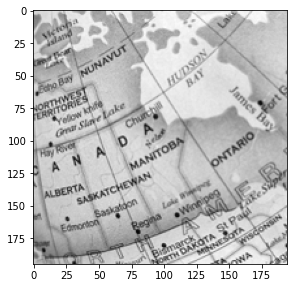

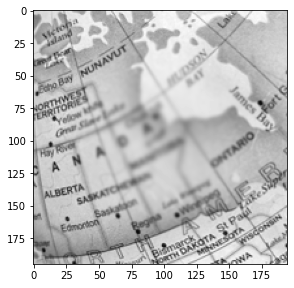

In [20]:
fig = plt.figure(figsize=(10, 10))
fig.add_subplot(1, 2, 1)
plt.imshow(img_globe,cmap="gray")
fig = plt.figure(figsize=(10, 10))
fig.add_subplot(1, 2, 2)
plt.imshow(blurred,cmap="gray")

### Question 2

In [27]:
[x, y] = np.shape(img_nautilus)
sigma = 1.0
sigma_matrix = sigma*np.ones((x, y))


In [40]:
blurred1 = space_variant_blur(img_nautilus, sigma_matrix)

/tmp/ipykernel_3788/4093137464.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return w.astype(np.int)


Performing space-varying blur...


In [41]:
def convolve2D(image,kernel):
    
    if kernel.shape==(1,): #Returns the image if sigma=0
        return image
    
    kernel = np.flipud(np.fliplr(kernel)) #flipping the kernel
    
    kshape=kernel.shape[0]
    xImgShape = image.shape[0]
    yImgShape = image.shape[1]
    
    
    padding=kshape//2 #Calculating extra zeros to pad in the image
    
    xout=xImgShape+2*padding 
    yout=yImgShape+2*padding
    
    
    
    output = np.zeros((xout,yout))
    output[padding:-padding,padding:-padding]=image 
    
    output_image = np.zeros((xImgShape,yImgShape)) 
    
    for x in range(padding,image.shape[0]+padding):
        for y in range(padding,image.shape[1]+padding):
            output_image[x-padding,y-padding]=(kernel * output[x-padding: x + padding+1, y-padding: y + padding+1]).sum()
           
    return output_image
                      

In [42]:
def kernel(sigma):#Returns the kernel matrix for a corresponding sigma
    if (sigma==0):
        return np.array([1])
    limit=m.ceil(6*sigma+1)
    if limit%2==0:
        limit=limit+1
    
    kernel_matrix=np.zeros((limit,limit))
    ran=limit/2
    ran=m.floor(ran)
    x,y=-ran,ran
    sum=0
    for i in range(limit):
        for j in range(limit):
            kernel_matrix[i][j]=m.exp(-((x)**2+(y)**2)/(2*sigma**2))/(2*m.pi*sigma**2)
            x=x+1
        y=y-1
        x=-ran
    
    su=np.sum(kernel_matrix)
    kernel_matrix=kernel_matrix/su
        
    return kernel_matrix
        

In [43]:
sigma=1
blurred2=convolve2D(img_nautilus,kernel(sigma))

Text(0.5, 1.0, 'Original Image')

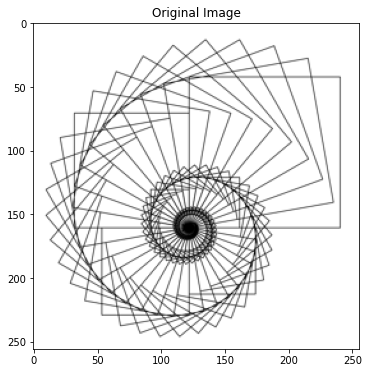

In [44]:
fig = plt.figure(figsize=(6, 6))
plt.imshow(img_nautilus,cmap="gray")
plt.title("Original Image")

Text(0.5, 1.0, 'Space Invariant blur')

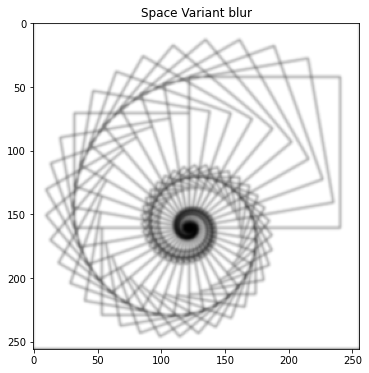

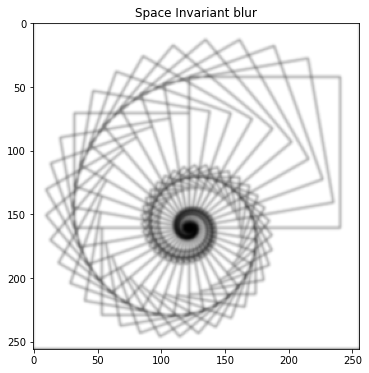

In [45]:
fig = plt.figure(figsize=(6, 6))
plt.imshow(blurred1,cmap="gray")
plt.title("Space Variant blur")
fig = plt.figure(figsize=(6, 6))
plt.imshow(blurred2,cmap="gray")
plt.title("Space Invariant blur")

#### To human eye the blur diffrences are imperceptible

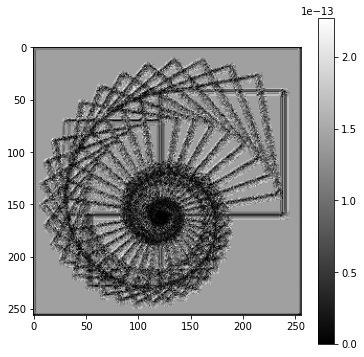

In [53]:
fig = plt.figure(figsize=(6, 6))
plt.imshow(np.abs(blurred1-blurred2),cmap="gray")
plt.colorbar()

#### The blur differences can fall to a order of 13. However, most are around order 1.